In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# !unzip drive/My\ Drive/poke-dex

In [0]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [0]:
x_train = np.load('/content/poke-dex/X_train.npy')
x_test = np.load('/content/poke-dex/X_test.npy')
y_train = np.load('/content/poke-dex/Y_train.npy')
sample = pd.read_csv('/content/poke-dex/sample_output.csv')

In [118]:
print(x_train.shape, y_train.shape)
print(x_test.shape, sample.shape)

(1252, 227, 227, 3) (1252,)
(313, 227, 227, 3) (313, 2)


In [119]:
print(x_train.shape, y_train.shape)
print(x_test.shape, sample.shape)

(1252, 227, 227, 3) (1252,)
(313, 227, 227, 3) (313, 2)


In [0]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes=10)

In [121]:
print(y_train.shape)

(1252, 10)


In [94]:
x_train[0].shape

(224, 224, 3)

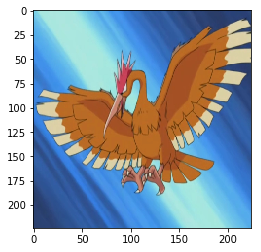

In [95]:
plt.imshow(x_train[0]);

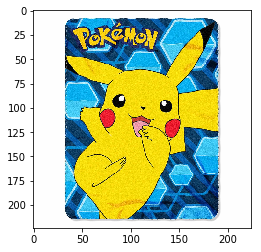

In [96]:
plt.imshow(x_test[0]);

In [128]:
print(x_train.shape, y_train.shape)
print(x_test.shape, sample.shape)

(1252, 227, 227, 3) (1252, 10)
(313, 227, 227, 3) (313, 2)


In [0]:
datagen_train = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True  # randomly flip images
)


### Model architecture

In [0]:
from keras.optimizers import Adam
from keras.models import *
from keras.layers import *
from keras.applications.mobilenet_v2 import mobilenet_v2

In [0]:
model = MobileNetV2(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))

In [0]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256, activation='relu')(av1)
d1 = Dropout(0.25)(fc1)
fc2 = Dense(10, activation='softmax')(d1)

In [0]:
new_model = Model(model.input, outputs  = fc2)

In [110]:
new_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [0]:
adam = Adam(lr=0.00003)
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [112]:
hist = new_model.fit(x_train, y_train,  epochs=20, validation_split=0.2, batch_size=1)

Train on 1001 samples, validate on 251 samples
Epoch 1/20
1001/1001 [==============================] - 122s 122ms/step - loss: 2.3348 - acc: 0.0999 - val_loss: 2.2938 - val_acc: 0.1315
Epoch 2/20
1001/1001 [==============================] - 99s 99ms/step - loss: 2.2905 - acc: 0.1279 - val_loss: 2.2882 - val_acc: 0.1275
Epoch 3/20
1001/1001 [==============================] - 98s 98ms/step - loss: 2.2873 - acc: 0.1219 - val_loss: 2.2834 - val_acc: 0.1275
Epoch 4/20
1001/1001 [==============================] - 98s 98ms/step - loss: 2.2854 - acc: 0.1229 - val_loss: 2.2803 - val_acc: 0.1275
Epoch 5/20
  91/1001 [=>............................] - ETA: 1:24 - loss: 2.2882 - acc: 0.0989

KeyboardInterrupt: ignored

In [114]:
from google.colab import files
files.upload()

Saving resnet.py to resnet.py


{'resnet.py': b'from __future__ import division\n\nimport six\nfrom keras.models import Model\nfrom keras.layers import (\n    Input,\n    Activation,\n    Dense,\n    Flatten\n)\nfrom keras.layers.convolutional import (\n    Conv2D,\n    MaxPooling2D,\n    AveragePooling2D\n)\nfrom keras.layers.merge import add\nfrom keras.layers.normalization import BatchNormalization\nfrom keras.regularizers import l2\nfrom keras import backend as K\n\n\ndef _bn_relu(input):\n    """Helper to build a BN -> relu block\n    """\n    norm = BatchNormalization(axis=CHANNEL_AXIS)(input)\n    return Activation("relu")(norm)\n\n\ndef _conv_bn_relu(**conv_params):\n    """Helper to build a conv -> BN -> relu block\n    """\n    filters = conv_params["filters"]\n    kernel_size = conv_params["kernel_size"]\n    strides = conv_params.setdefault("strides", (1, 1))\n    kernel_initializer = conv_params.setdefault("kernel_initializer", "he_normal")\n    padding = conv_params.setdefault("padding", "same")\n    ke

In [0]:
import resnet

In [0]:
batch_size = 128
nb_classes = 10
nb_epoch = 100

# input image dimensions
img_rows, img_cols = 227, 227
# The CIFAR10 images are RGB.
img_channels = 3

In [122]:
model = resnet.ResnetBuilder.build_resnet_18((img_channels, img_rows, img_cols), nb_classes)

W0808 13:07:27.579887 140171607197568 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3980: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



In [123]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 227, 227, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 114, 114, 64) 9472        input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 114, 114, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 114, 114, 64) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [131]:
hist = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=1)

Train on 1001 samples, validate on 251 samples
Epoch 1/20
1001/1001 [==============================] - 93s 93ms/step - loss: nan - acc: 0.1169 - val_loss: nan - val_acc: 0.1275
Epoch 2/20
1001/1001 [==============================] - 71s 71ms/step - loss: nan - acc: 0.1289 - val_loss: nan - val_acc: 0.1275
Epoch 3/20
1001/1001 [==============================] - 71s 71ms/step - loss: nan - acc: 0.1289 - val_loss: nan - val_acc: 0.1275
Epoch 4/20
1001/1001 [==============================] - 71s 71ms/step - loss: nan - acc: 0.1259 - val_loss: nan - val_acc: 0.1275
Epoch 5/20
1001/1001 [==============================] - 71s 71ms/step - loss: nan - acc: 0.1289 - val_loss: nan - val_acc: 0.1275
Epoch 6/20
1001/1001 [==============================] - 71s 71ms/step - loss: nan - acc: 0.1289 - val_loss: nan - val_acc: 0.1275
Epoch 7/20
1001/1001 [==============================] - 71s 71ms/step - loss: nan - acc: 0.1289 - val_loss: nan - val_acc: 0.1275
Epoch 8/20
1001/1001 [=====================

In [0]:
label_dict = {
    0 : "Aerodactyl",  
    1 : "Bulbasaur",  
    2 : "Charmander", 
    3 : "Dratini",  
    4 : "Fearow",  
    5 : "Mewtwo",  
    6 : "Pikachu",  
    7 : "Psyduck",  
    8 : "Spearow",  
    9 : "Squirtle"
}

In [0]:
p = model.predict(x_test[4].reshape(1, 227, 227, 3))

In [166]:
p

array([[0.06899233, 0.11740078, 0.11446965, 0.07501724, 0.06864895,
        0.11559769, 0.12103254, 0.10407846, 0.08603424, 0.12872809]],
      dtype=float32)

In [143]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])